[[12.22137322  9.38166325]
 [12.8965512  16.81119658]
 [ 8.95283427  8.9529077 ]
 ...
 [ 8.36623236 10.82591544]
 [ 3.97546808  5.65480992]
 [15.3684142   7.06227948]]


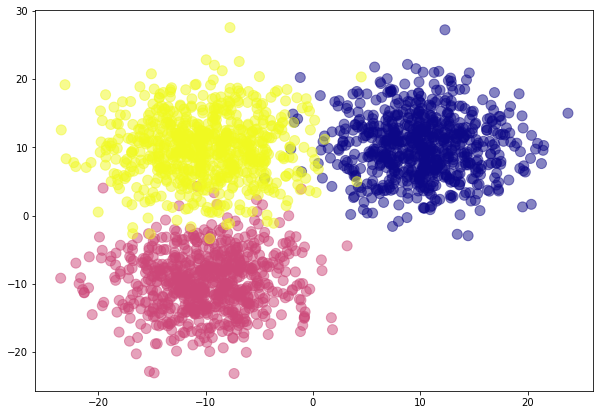

Loss function value:  4136.382962766668
Loss function value:  114.08447746601954
Loss function value:  107.14110713326446
Loss function value:  104.75684899718578
Loss function value:  104.9819883412031
Loss function value:  104.05288395250547
Loss function value:  104.46636690426398
Loss function value:  104.08095452757954
Loss function value:  102.3548989119547
Loss function value:  101.91540069449039
Loss function value:  101.54328566975695
Loss function value:  105.35017427897867
Loss function value:  102.00762595384819
Loss function value:  101.42352388421818
Loss function value:  101.20030348334983
Loss function value:  101.24159353688896
Loss function value:  112.34114757692493
Loss function value:  101.798695350332
Loss function value:  101.23005679521577
Loss function value:  101.01059292548587
Loss function value:  100.92103810495138
Loss function value:  103.29386091626833
Loss function value:  102.13485884013012
Loss function value:  101.06082307896978
Loss function value: 

Loss function value:  99.48248311832944
Loss function value:  101.9153659878238
Loss function value:  102.84622584685384
Loss function value:  99.33696743203652
Loss function value:  99.24483920651417
Loss function value:  99.57495345983733
Loss function value:  102.66799268025898
Loss function value:  101.54606058789383
Loss function value:  99.29868694568182
Loss function value:  99.24492652363404
Loss function value:  99.65980891909163
Loss function value:  103.25110472366447
Loss function value:  100.8729119085726
Loss function value:  99.27509380307617
Loss function value:  99.24492362649758
Loss function value:  99.72797664997535
Loss function value:  103.65301502707959
Loss function value:  100.5327689516717
Loss function value:  99.25919111304671
Loss function value:  99.24373723870985
Loss function value:  99.77612814950785
Loss function value:  103.90515686736106
Loss function value:  100.3551338276911
Loss function value:  99.24766811095492
Loss function value:  99.241160336

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#Class 1
mean = [10,10]
cov = [[20,0],
       [0,20]] 
Class1 = np.random.multivariate_normal(mean,cov,700)

print(Class1)

mean = [-10,-10]
cov = [[20,0],
       [0,20]] 
Class2 = np.random.multivariate_normal(mean,cov,700)

mean = [-10,10]
cov = [[20,0],
       [0,20]] 
Class3 = np.random.multivariate_normal(mean,cov,700)


feature_set = np.vstack([Class1, Class2, Class3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)

In [7]:
import keras
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#plt.style.use('ggplot')

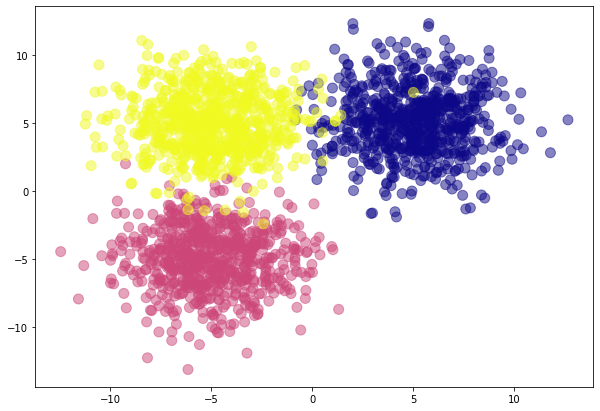

In [8]:
#Class 1
mean = [5,5]
cov = [[5,0],
       [0,5]] 
Class1 = np.random.multivariate_normal(mean,cov,700)

#print(Class1)

#print(Class1)

mean = [-5,-5]
cov = [[5,0],
       [0,5]] 
Class2 = np.random.multivariate_normal(mean,cov,700)

mean = [-5,5]
cov = [[5,0],
       [0,5]] 
Class3 = np.random.multivariate_normal(mean,cov,700)


feature_set = np.vstack([Class1, Class2, Class3])
labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [10]:
X_train = feature_set;
Y_train = labels;
model = Sequential()
model.add(Dense(3, activation = 'relu')) # input layer requires input_dim param
model.add(Dense(16, activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

model.fit(X_train, Y_train, epochs = 100, shuffle = True, batch_size=128, verbose=2)

scores = model.evaluate(x_test, y_test)
print(model.metrics_names[0], model.metrics_names[1])

Epoch 1/100


ValueError: in user code:

    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\navsa\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible
